In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
%cd "/content/drive/MyDrive/8 Semestre/Bloque 2/M2_IA/archive/tom_and_jerry"
!ls

/content/drive/MyDrive/8 Semestre/Bloque 2/M2_IA/archive/tom_and_jerry
tom_and_jerry


In [47]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
base_dir = 'tom_and_jerry'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    # width_shift_range = 0.2,
		#	height_shift_range = 0.2,
		#	shear_range = 0.3,
		#	zoom_range = 0.3,
    horizontal_flip = True,
    #fill_mode = 'nearest',
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (224, 224),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size = (224, 224),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'validation',  # Especificar que este es el conjunto de validación
    shuffle = True
)


Found 4494 images belonging to 4 classes.
Found 1122 images belonging to 4 classes.


<Figure size 640x480 with 0 Axes>

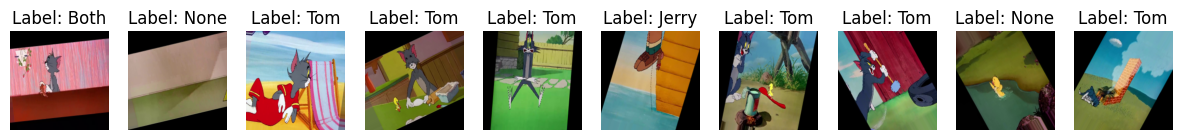

In [49]:
label_categories = {
    0: "Jerry",
    1: "Tom",
    2: "None",
    3: "Both"
}

images , labels = train_generator[0]
num_imgs = min(images.shape[0], 10)
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, num_imgs, figsize=(15, 5))

for i in range(num_imgs) :
  axarr[i].imshow(images[i])
  label_index = labels[i].argmax()
  axarr[i].title.set_text(f"Label: {label_categories[label_index]}")
  axarr[i].axis('off')

In [50]:
"""
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (224, 224),
    batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (224, 224),
    batch_size = 32)
"""

'\ntrain_ds = tf.keras.utils.image_dataset_from_directory(\n    base_dir,\n    validation_split = 0.2,\n    subset = "training",\n    seed = 123,\n    image_size = (224, 224),\n    batch_size = 32)\n\nval_ds = tf.keras.utils.image_dataset_from_directory(\n    base_dir,\n    validation_split = 0.2,\n    subset = "validation",\n    seed = 123,\n    image_size = (224, 224),\n    batch_size = 32)\n'